### pip install & import

In [155]:
# %pip install sklearn 
# %pip install seaborn
# %pip install cmake
# %pip install xgboost
# %pip install -U pandas-profiling

In [229]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#import pandas_profiling
import datetime

In [230]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

# 2003~2024년 데이터 전처리


### 데이터 값 읽어오기

In [287]:
# 데이터 값 읽어오기 
data_file = "../data/movie_data/KOBIS_개봉일람_2023-03-23.csv"
df = pd.read_csv(data_file, encoding='UTF-8',index_col = "순번")

### 생략된 내용을 추가로 보는 코드

In [288]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10000)
# col 생략 없이 출력
pd.set_option('display.max_columns',10000)

In [289]:
# 널값 확인
df.isnull()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19901,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19902,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [290]:
# 빈값 확인

df.isnull().sum()

영화명            0
감독          1298
제작사        12618
수입사         8178
배급사           76
개봉일            2
영화유형           0
영화형태           1
국적             1
전국 스크린수        0
전국 매출액        44
전국 관객수         0
서울 매출액        50
서울 관객수         0
장르            71
등급             5
영화구분           0
dtype: int64

In [291]:
# 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19904 entries, 1 to 19904
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19904 non-null  object
 1   감독       18606 non-null  object
 2   제작사      7286 non-null   object
 3   수입사      11726 non-null  object
 4   배급사      19828 non-null  object
 5   개봉일      19902 non-null  object
 6   영화유형     19904 non-null  object
 7   영화형태     19903 non-null  object
 8   국적       19903 non-null  object
 9   전국 스크린수  19904 non-null  object
 10  전국 매출액   19860 non-null  object
 11  전국 관객수   19904 non-null  object
 12  서울 매출액   19854 non-null  object
 13  서울 관객수   19904 non-null  object
 14  장르       19833 non-null  object
 15  등급       19899 non-null  object
 16  영화구분     19904 non-null  object
dtypes: object(17)
memory usage: 2.7+ MB


### 결측치 데이터 처리하기

In [292]:
# 제작사, 수입사는 결측치가 너무 많아, drop
# 나머지 결측치는 기타로 변경

df = df.drop(['제작사', '수입사'], axis=1)
df['감독'].fillna('기타', inplace=True)
df['장르'].fillna('기타', inplace=True)
df['배급사'].fillna('기타', inplace=True)
df['영화형태'].fillna('기타', inplace=True)

# 한개가 결측치가 나와서 기타로 치환
df['국적'].fillna('기타', inplace=True)

# 서울 매출액 결측치 제거(사용을 안하니깨문에 0으로 변경)
df['서울 매출액'].fillna(0, inplace=True)
# 남은 결측치 제거

for i in df['개봉일'][df['개봉일'].isnull()].index:
    df = df.drop(i)

for i in df['전국 매출액'][df['전국 매출액'].isnull()].index:
    df = df.drop(i)

for i in df['등급'][df['등급'].isnull()].index:
    df = df.drop(i)

In [293]:
# 최종확인

df.isnull().sum()

영화명        0
감독         0
배급사        0
개봉일        0
영화유형       0
영화형태       0
국적         0
전국 스크린수    0
전국 매출액     0
전국 관객수     0
서울 매출액     0
서울 관객수     0
장르         0
등급         0
영화구분       0
dtype: int64

### 범주형 데이터값 확인

In [294]:
# 범주형 데이터 값 확인

category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19484
컬럼 [감독] UNIQUE : 7876
컬럼 [배급사] UNIQUE : 1357
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 18
컬럼 [영화구분] UNIQUE : 2


### 복수의 감독, 배급사 데이터를 한개 데이터로 변경, (연령)등급 4가지로 정리

In [295]:
# 다수의 감독 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        df['감독'][idx] = directors[0].strip()

In [296]:
# 다수의 배급사를 앞에 있는 배급사로 취급

for idx, row in df.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        df['배급사'][idx] = distributor[0].strip()

In [297]:
# 영화유형은 두개 뿐이라 제거

df.drop('영화유형', axis=1, inplace=True)

In [298]:
# 등급 데이터 전처리

for idx, row in df.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            df['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            df['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            df['등급'][idx] = '15세관람가'
        else:
            df['등급'][idx] = '청소년관람불가'
    elif df['등급'][idx] == '18세관람가' or df['등급'][idx] == '제한상영가': 
        df['등급'][idx] = '청소년관람불가'
    else:
        df['등급'][idx] = df['등급'][idx].replace('이상', '')

### 전국 매출액, 스크린수, 관객수 int 타입변경 

In [299]:
# 전국 매출액, 스크린 수, 관객수를 확인을 위해 int형으로 변경

df['전국 매출액'] = df['전국 매출액'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 매출액'] = df['전국 매출액'].astype('int64')

df['전국 스크린수'] = df['전국 스크린수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 스크린수'] = df['전국 스크린수'].astype('int64')

df['전국 관객수'] = df['전국 관객수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 관객수'] = df['전국 관객수'].astype('int64')


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19854 entries, 1 to 19904
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19854 non-null  object
 1   감독       19854 non-null  object
 2   배급사      19854 non-null  object
 3   개봉일      19854 non-null  object
 4   영화형태     19854 non-null  object
 5   국적       19854 non-null  object
 6   전국 스크린수  19854 non-null  int64 
 7   전국 매출액   19854 non-null  int64 
 8   전국 관객수   19854 non-null  int64 
 9   서울 매출액   19854 non-null  object
 10  서울 관객수   19854 non-null  object
 11  장르       19854 non-null  object
 12  등급       19854 non-null  object
 13  영화구분     19854 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.8+ MB


# 데이터 리사이징 하기
전국 스크린수, 전국 관객수 좌로 편향된 그래프 pr_report.html(태현폴더) <br>
때문에 아래의 리사이징 실행


In [301]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

movie_resize = df[(df['전국 관객수'] > 10000)]
movie_resize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 1 to 4867
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      4835 non-null   object
 1   감독       4835 non-null   object
 2   배급사      4835 non-null   object
 3   개봉일      4835 non-null   object
 4   영화형태     4835 non-null   object
 5   국적       4835 non-null   object
 6   전국 스크린수  4835 non-null   int64 
 7   전국 매출액   4835 non-null   int64 
 8   전국 관객수   4835 non-null   int64 
 9   서울 매출액   4835 non-null   object
 10  서울 관객수   4835 non-null   object
 11  장르       4835 non-null   object
 12  등급       4835 non-null   object
 13  영화구분     4835 non-null   object
dtypes: int64(3), object(11)
memory usage: 566.6+ KB


In [302]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

movie_resize2 = df[(df['전국 관객수'] > 1000) & (df['전국 스크린수'] > 50)& (df['전국 관객수'] < 11000000)]
movie_resize2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 25 to 7927
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      4148 non-null   object
 1   감독       4148 non-null   object
 2   배급사      4148 non-null   object
 3   개봉일      4148 non-null   object
 4   영화형태     4148 non-null   object
 5   국적       4148 non-null   object
 6   전국 스크린수  4148 non-null   int64 
 7   전국 매출액   4148 non-null   int64 
 8   전국 관객수   4148 non-null   int64 
 9   서울 매출액   4148 non-null   object
 10  서울 관객수   4148 non-null   object
 11  장르       4148 non-null   object
 12  등급       4148 non-null   object
 13  영화구분     4148 non-null   object
dtypes: int64(3), object(11)
memory usage: 486.1+ KB


In [303]:
# 값 내보내기
#movie_resize.to_csv('./movie_resize2.csv',index=False, encoding="utf-8-sig")

### 배급사 추가로 변경 더 해야 해yo(성진오빠)

In [304]:
# 점수 처리를 위해 변경

# '( )' 안쪽의 글씨 (ex> (주), (유), (사) etc.,) 함께 삭제
movie_resize2['배급사']=movie_resize2.배급사.str.replace(r"\(.*\)","") 
movie_resize2['배급사']=movie_resize2.배급사.str.replace("㈜","")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("주식회사","")

# (주)씨제이이엔엠 으로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("CJ ENM","씨제이이엔엠")

# 롯데엔터테인먼트 로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("롯데쇼핑롯데엔터테인먼트","롯데엔터테인먼트")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("롯데컬처웍스(주)롯데엔터테인먼트","롯데엔터테인먼트")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("롯데쇼핑(주)롯데시네마","롯데엔터테인먼트")


# 월트디즈니스튜디오스코리아 로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("월트디즈니컴퍼니코리아 유한책임회사","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("소니픽쳐스릴리징월트디즈니스튜디오스코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("브에나비스타인터내셔널코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("소니픽쳐스엔터테인먼트코리아식회사극장배급지점","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("한국소니픽쳐스릴리징브에나비스타영화㈜","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("소니픽쳐스릴리징코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("월트디즈니코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("월트디즈니컴퍼니코리아","월트디즈니스튜디오스코리아")

# 이십세기폭스코리아 로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("이십세기폭스필름코퍼레이션","이십세기폭스코리아")

# 이름 통일 (KBS 미디어)
movie_resize2['배급사']=movie_resize2.배급사.str.replace("케이비에스미디어","KBS 미디어")

# 이름 통일 (에스케이 텔레콤)
movie_resize2['배급사']=movie_resize2.배급사.str.replace("에스케이플래닛","에스케이텔레콤")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3008876665.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_resize2['배급사']=movie_resize2.배급사.str.replace(r"\(.*\)","")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3008876665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['배급사']=movie_resize2.배급사.str.replace(r"\(.*\)","")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3008876665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [305]:
# 국적 데이터 변경
for idx, row in movie_resize2.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize2['국적'][idx] = '기타'


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\1341639067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['국적'][idx] = '기타'


In [306]:
# 값 확인

movie_resize2['국적'].value_counts()


미국     1527
한국     1269
일본      412
기타      411
영국      189
프랑스     164
중국      118
독일       58
Name: 국적, dtype: int64

In [307]:
# 값 내보내기
# movie_resize.to_csv('./movie_resize2.csv',index=False, encoding="utf-8-sig")

### 날짜 데이터 datetime으로 변경

In [308]:
# 날짜 데이터를 datetime으로 변경
movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')
movie_resize2['연도'] = movie_resize2['개봉일'].dt.year
movie_resize2['월'] = movie_resize2['개봉일'].dt.month

movie_resize2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 25 to 7927
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      4148 non-null   object        
 1   감독       4148 non-null   object        
 2   배급사      4148 non-null   object        
 3   개봉일      4148 non-null   datetime64[ns]
 4   영화형태     4148 non-null   object        
 5   국적       4148 non-null   object        
 6   전국 스크린수  4148 non-null   int64         
 7   전국 매출액   4148 non-null   int64         
 8   전국 관객수   4148 non-null   int64         
 9   서울 매출액   4148 non-null   object        
 10  서울 관객수   4148 non-null   object        
 11  장르       4148 non-null   object        
 12  등급       4148 non-null   object        
 13  영화구분     4148 non-null   object        
 14  연도       4148 non-null   int64         
 15  월        4148 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(10)
memory usage: 679.9+ KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\2014669806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\2014669806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['연도'] = movie_resize2['개봉일'].dt.year
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\2014669806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

### 시즌 데이터 변경

In [309]:
# 시즌 데이터 변경

season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

movie_resize2['계절'] = movie_resize2[['월']].apply(lambda x: x.map(season))


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\2576401166.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['계절'] = movie_resize2[['월']].apply(lambda x: x.map(season))


In [310]:
movie_resize2.drop('서울 매출액', axis=1, inplace=True)
movie_resize2.drop('서울 관객수', axis=1, inplace=True)


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3840169299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2.drop('서울 매출액', axis=1, inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3840169299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2.drop('서울 관객수', axis=1, inplace=True)


In [311]:
movie_total_people = pd.read_csv('../data/movie_data/movie_total_people.csv',index_col='연도',encoding='UTF-8')
movie_total_people

,개봉편수,상영편수,매출액,관객수
연도,,,,
2004,280,300,"440,728,906,206","69,254,626"
2005,306,415,"780,364,979,467","123,352,059"
2006,351,482,"892,442,138,000","144,256,035"
2007,393,611,"965,486,624,538","152,022,992"
2008,380,804,"961,453,297,251","147,428,639"
2009,362,714,"1,083,196,004,950","155,398,654"
2010,430,797,"1,157,254,738,250","147,759,214"
2011,442,943,"1,235,799,464,200","159,724,465"
2012,641,"1,231","1,455,140,354,435","194,890,587"


In [312]:
movie_total_people['관객수'] = movie_total_people['관객수'].str.replace(pat=r',', repl=r'', regex=True)
movie_total_people['관객수'] = movie_total_people['관객수'].astype('int64')

In [313]:
movie_total_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2004 to 2023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개봉편수    20 non-null     object
 1   상영편수    20 non-null     object
 2   매출액     20 non-null     object
 3   관객수     20 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [314]:
movie_resize2['총 관객수'] = [0 for _ in range(len(movie_resize2))]
movie_resize2

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\2770689088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['총 관객수'] = [0 for _ in range(len(movie_resize2))]


,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수
순번,,,,,,,,,,,,,,,,
25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,2022,12,겨울,0
26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,2015,4,봄,0
27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,2019,5,봄,0
28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,2014,1,겨울,0
29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,2014,11,가을,0
30,보헤미안 랩소디,브라이언 싱어,월트디즈니스튜디오스코리아,2018-10-31,장편,미국,936,86280975785,9948386,드라마,12세관람가,일반영화,2018,10,가을,0
31,검사외전,이일형,쇼박스,2016-02-03,장편,한국,1812,77252755264,9699092,범죄,15세관람가,일반영화,2016,2,겨울,0
32,엑시트,이상근,씨제이이엔엠,2019-07-31,장편,한국,1660,79232212162,9426051,코미디,12세관람가,일반영화,2019,7,여름,0
33,관상,한재림,쇼박스,2013-09-11,장편,한국,1190,66005451500,9134586,사극,15세관람가,일반영화,2013,9,가을,0


# 총 관객수 구하기 => 2003 -> 2022, 2023은 2022로 변경

In [315]:
# 관객수 구하기
for idx, row in movie_total_people.iterrows():
    if idx == 2023 :
        movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = 112805094.0
    else :
        movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = row['관객수']

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3230032444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = row['관객수']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\3230032444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = 112805094.0


In [316]:
# # 관객 비율 구하기 
# movie_resize2['관객비율'] = (movie_resize2['전국 관객수'] / movie_resize2['총 관객수'])
# # 2003 1997 총 관객수 0명 데이터 때문에 위 코드 실행

In [317]:
# movie_resize2[movie_resize2['관객비율']==np.inf] = 0

# 예지언니 크롤링 데이터 머지

In [318]:
# 네이버 평점과 배우 가져옴

df2 = pd.read_csv("../data/movie_data/concat.csv", encoding='UTF-8',index_col='순번')
df2 = df2.drop(['네이버URL','이미지URL','제작연도','감독','연도'],axis=1)

In [319]:
# null 값이 있는 열 삭제 
df2 = df2[df2['출연'].isnull() == False] 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4331 entries, 0 to 4834
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화명     4331 non-null   object 
 1   출연      4331 non-null   object 
 2   평점      4331 non-null   float64
dtypes: float64(1), object(2)
memory usage: 135.3+ KB


In [320]:
# movie_resize3 = pd.merge(movie_resize2,df2,left_index=True,right_index=True)

In [321]:
movie_resize4 = pd.merge(movie_resize2,df2,on='영화명')
movie_resize4.to_csv('./movie_resize_merged.csv',encoding='utf-8')

# 리사이징 된 데이터에서 top 300 생성

### top 200 생성
movie_resize_ranking.csv

In [322]:
movie_resize2 = pd.read_csv('./movie_resize_merged.csv',encoding='utf-8')

In [267]:
# top200 만듬

# col = ['영화명', '감독', '배급사', '개봉일', '출연']
# movie_resize2.reset_index(drop=False,inplace=True)
# movie_resize2[col][:300].to_csv(
#     '../data/movie_data/movie_resize_ranking.csv', encoding="utf-8-sig")


In [268]:
# top 200 불러오기

movie_resize_ranking = pd.read_csv('../data/movie_data/movie_resize_ranking.csv',encoding='UTF-8')
movie_resize_ranking.drop('Unnamed: 0', axis=1, inplace=True)
movie_resize_ranking

,영화명,감독,배급사,개봉일,출연
0,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,"['시고니 위버', '스티븐 랭', '조 샐다나', '샘 워싱턴', '우나 채플린'..."
1,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스..."
2,기생충,봉준호,씨제이이엔엠,2019-05-30,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']"
3,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,"['크리스틴 벨', '이디나 멘젤']"
4,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']"
...,...,...,...,...,...
295,테이큰 2,올리비에 메가턴,이십세기폭스코리아,2012-09-27,"['리암 니슨', '매기 그레이스', '팜케 얀센', '라드 세르베드지야']"
296,하녀,임상수,싸이더스,2010-05-13,"['전도연', '이정재', '윤여정', '서우']"
297,메이즈 러너: 데스 큐어,웨스 볼,이십세기폭스코리아,2018-01-17,"['딜런 오브라이언', '토마스 생스터', '이기홍', '카야 스코델라리오']"
298,분노의 질주: 더 얼티메이트,저스틴 린,유니버설픽쳐스인터내셔널 코리아,2021-05-19,"['빈 디젤', '샤를리즈 테론', '미셸 로드리게즈', '조다나 브류스터', '존..."


In [269]:
# 점수화를 위해 개봉일을 datetime 타입으로 변경

movie_resize_ranking['개봉일'] = movie_resize_ranking['개봉일'].astype('datetime64')

### 점수화행 만들기

In [270]:
# 점수화행 만들기

import datetime

movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')

movie_final = movie_resize2.copy()
movie_final['감독_흥행'] = [0 for _ in range(len(movie_resize2))]
movie_final['배급사_흥행'] = [0 for _ in range(len(movie_resize2))]
movie_final['주연배우_흥행'] = [0 for _ in range(len(movie_resize2))]

In [271]:
df[df['영화명']=='돈의 맛']

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,
770,돈의 맛,임상수,(주)시너지하우스,2012-05-17,장편,한국,643,8776870611,1165488,"2,880,753,111","365,067",드라마,청소년관람불가,일반영화


In [286]:
# 배급사 널값 제거
movie_final['배급사']

0                 월트디즈니스튜디오스코리아
1                 월트디즈니스튜디오스코리아
2                        씨제이이엔엠
3                 월트디즈니스튜디오스코리아
4                    워너브러더스 코리아
5                 월트디즈니스튜디오스코리아
6                           쇼박스
7                        씨제이이엔엠
8                           쇼박스
9                 월트디즈니스튜디오스코리아
10                       씨제이이엔엠
11                월트디즈니스튜디오스코리아
12                       씨제이이엔엠
13                     롯데엔터테인먼트
14                          쇼박스
15                       씨제이이엔엠
16                     롯데엔터테인먼트
17               롯데컬처웍스롯데엔터테인먼트
18         소니픽쳐스엔터테인먼트코리아극장배급지점
19                       씨제이이엔엠
20                       씨제이이엔엠
21                       씨제이이엔엠
22                       씨제이이엔엠
23         소니픽쳐스엔터테인먼트코리아극장배급지점
24                    (주)씨제이이엔엠
25                   워너브러더스 코리아
26                     롯데엔터테인먼트
27                       씨제이이엔엠
28               롯데컬처웍스롯데엔터테인먼트
29         소니픽쳐스엔터테인먼트코리아극장배급지점
30                       씨제이이엔엠
31      

In [278]:
# 순번을 쓰기 위해 인덱스 풀기

movie_resize_ranking.reset_index(drop=False,inplace=True)

### 감독, 배급사 점수화 코드

In [280]:
# 감독 점수화 코드

for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['감독'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['감독'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10
        movie_final.loc[idx, '감독_흥행'] = score

In [188]:
# 배급사 정수화 코드 
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['배급사'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['배급사'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10
        movie_final.loc[idx, '배급사_흥행'] = score

AttributeError: 'float' object has no attribute 'strip'

In [182]:
# 배우의 경우 '["배우1", "배우2"]'와 같은 형태이므로 각 값을 뽑아낸다.
# literal_evel : 문자열 그대로 파이썬 명령을 실행시켜주는 함수
# 예시---------------------------------------
# 문자열 : "['문자열1', '문자열2', 22, '33']"
# 리스트 : ['문자열1', '문자열2', 22, '33']
from ast import literal_eval


In [192]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    # 해당 영화의 배우 확인
    this_actors = literal_eval(row['출연'])
    scores = [0] * len(this_actors)
    # 개봉일 이전 영화의 모든 배우 확인
    for i in range(len(this_actors)):
        actors = movie_resize_ranking.query(f'개봉일 < "{open}"')
        actors = actors.query(
            f'출연.str.contains("{this_actors[i]}")', engine='python')
        if len(actors) > 0:
            score = actors.index[0]
            if score >= 271:
                score = 1
            elif score >= 241:
                score = 2
            elif score >= 211:
                score = 3
            elif score >= 181:
                score = 4
            elif score >= 151:
                score = 5
            elif score >= 121:
                score = 6
            elif score >= 91:
                score = 7
            elif score >= 61:
                score = 8
            elif score >= 31:
                score = 9
            else:
                score = 10
            scores[i] = score

    # 평균/합/최대값 중에 잘 나오는 걸로        
    # 평균값
    # movie_final.loc[idx, '주연배우_흥행'] = round(sum(scores) / len(scores), 1)
    # 합
    movie_final.loc[idx, '주연배우_흥행'] = sum(scores)
    # 최대값
    # movie_final.loc[idx, '주연배우_흥행'] = max(scores)


In [184]:
# 값 확인
(movie_final['배급사_흥행'] == 0).value_counts()

True     2887
False     323
Name: 배급사_흥행, dtype: int64

### moive final

In [193]:

movie_final

,index,Unnamed: 0,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,0,0,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,2022,12,겨울,112805094,"['시고니 위버', '스티븐 랭', '조 샐다나', '샘 워싱턴', '우나 채플린'...",8.65,0,10,10
1,1,1,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,2015,4,봄,217299523,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,9,10,76
2,2,2,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,2019,5,봄,226678777,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,10,10,25
3,3,3,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,2014,1,겨울,215068958,"['크리스틴 벨', '이디나 멘젤']",9.13,0,10,0
4,4,4,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,2014,11,가을,215068958,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']",9.12,9,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,3205,3205,눈발,조재민,리틀빅픽쳐스,2017-03-01,장편,한국,69,84806300,10039,드라마,15세관람가,독립/예술영화,2017,3,봄,219876227,"['진영', '지우']",7.73,0,0,7
3206,3206,3206,올드보이,스파이크 리,나이너스엔터테인먼트,2014-01-16,장편,미국,109,56281683,7471,액션,청소년관람불가,일반영화,2014,1,겨울,215068958,"['최민식', '유지태', '강혜정']",9.04,0,0,7
3207,3207,3207,화이트 노이즈,노아 바움백,씨제이 씨지브이,2022-12-07,장편,미국,62,36305700,4534,코미디,15세관람가,일반영화,2022,12,겨울,112805094,"['마이클 키튼', '찬드라 웨스트', '데보라 웅거']",5.00,0,0,10
3208,3208,3208,와일드 카드,사이먼 웨스트,영화사 빅,2015-03-19,장편,미국,69,23712000,3109,범죄,청소년관람불가,일반영화,2015,3,봄,217299523,"['정진영', '양동근', '한채영']",8.88,0,0,2


# 최종 데이터 불러오기
위에코드를 매번 실행하지 않고 파일로 불러와서 실행 

# ????

In [ ]:
# # 데이터 불러오기(파일 미완성.movie_resize2와 이름이 다름 )
# df = pd.read_csv('./movie_resize2.csv',index_col=0,encoding='UTF-8')
# df.reset_index(drop=False,inplace=True)
# df

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...
4637,나의 어머니,난니 모레티,(주)티캐스트,2015-08-20,장편,이탈리아,30,76569151,10031,드라마,12세관람가,독립/예술영화
4638,타이페이 카페 스토리,샤오 야 췐,찬란,2011-07-07,장편,대만,10,76832900,10023,드라마,전체관람가,독립/예술영화
4639,테라 3D: 인류 최후의 전쟁,아리스토메니스 치바스,주식회사 마운틴픽쳐스,2010-11-04,장편,미국,48,106210549,10023,애니메이션,전체관람가,일반영화
4640,글로리아 벨,세바스찬 렐리오,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2019-06-06,장편,미국,48,77962520,10021,드라마,15세관람가,독립/예술영화


# ---전처리---

## 원핫인코딩 

In [ ]:
# 원핫인코딩

# movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

## 라벨링

In [194]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()

movie_labels = movie_final.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final['계절'])
movie_labels.head(3)


,index,Unnamed: 0,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,0,0,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,2,2,2809,137325939643,10779198,16,0,1,2022,12,1,112805094,"['시고니 위버', '스티븐 랭', '조 샐다나', '샘 워싱턴', '우나 채플린'...",8.65,0,10,10
1,1,1,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,2,2,1843,88582586366,10494499,16,0,1,2015,4,2,217299523,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,9,10,76
2,2,2,기생충,봉준호,씨제이이엔엠,2019-05-30,2,7,1948,87459829095,10313086,6,1,1,2019,5,2,226678777,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,10,10,25


In [195]:
movie_labels_2023 = movie_labels[movie_labels['연도']==2023]
movie_labels_etc = movie_labels[movie_labels['연도']!=2023]

In [196]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사', '영화형태', '개봉일', '영화구분', '연도', '월']

movie_DL = movie_labels_etc.drop(not_used, axis=1) # 2003~2022 데이터 main
movie_DL2 = movie_labels_2023.drop(not_used, axis=1)# 2023년 test


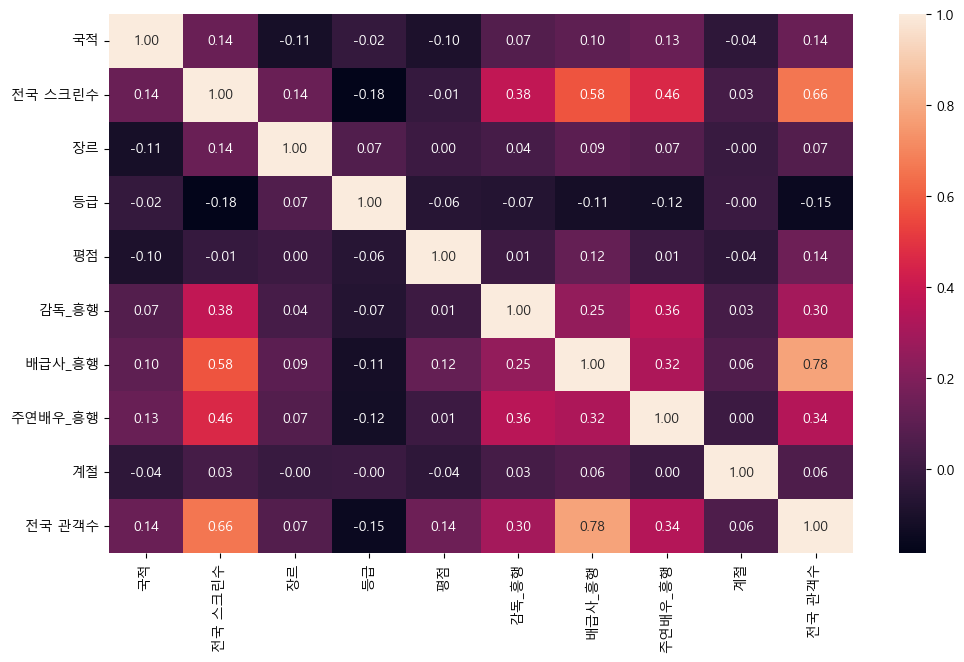

In [197]:
# 사용하는 수치형 데이터 히트맵
digital_cols2 = ['국적', '전국 스크린수', '장르', '등급', '평점',
                 '감독_흥행', '배급사_흥행', '주연배우_흥행', '계절', '전국 관객수']
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 7))
sns.heatmap(movie_DL[digital_cols2].corr(), annot=True, fmt='.2f')
plt.show()


In [124]:
# 입력 컬럼 확인(값을 하나 빼야한다 => 전국 관객수로 쓰려고)
len(movie_DL.columns)

15

In [125]:
# 독립 변수와 종속 변수 나눔

# 독립 = movie_DL[['감독_흥행', '배급사_흥행', '국적_기타', '국적_독일', '국적_미국',
#        '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연',
#        '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬',
#        '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_성인물(에로)', '장르_스릴러',
#        '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
#        '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '계절_가을', '계절_겨울',
#        '계절_봄', '계절_여름']] 
# 종속 = movie_DL[['전국 관객수']] 

In [126]:
# 국적 => 국내 vs 해외
# 관객비율.. 2023년 데이터 총 관객수 몰라....
# 비율 말고 총 관객수를 쓰자
# 총관객수 defqult를 2022년으로 해서 2023년 총관객수 채우면 어때?

In [198]:
# 독립 변수와 종속 변수 나눔

독립 = movie_DL[['국적', '장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '전국 스크린수', '총 관객수']]
종속 = movie_DL[['전국 관객수']]

In [199]:
# 독립 변수와 종속 변수 나눔

독립_2023 = movie_DL2[['국적', '장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '전국 스크린수', '총 관객수']]
종속_2023 = movie_DL2[['전국 관객수']]


## train, test 데이터 나누기

In [129]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.25,random_state=42)

## 스케일링... 
...어디서 할까...<br>
라벨링 때문에 바로 스케일링을 따로 해줘야함 (전국스크린수, 전국매출액)

# 딥러닝 


In [223]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[8])

H = tf.keras.layers.Dense(100)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu6)(H)

H = tf.keras.layers.Dense(90)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu6)(H)

H = tf.keras.layers.Dense(80)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu6)(H)

H = tf.keras.layers.Dense(70)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu6)(H)

H = tf.keras.layers.Dense(128)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu6)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu6)(H)
dropout = tf.keras.layers.Dropout(rate=0.3)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)
sgd = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.8,beta_2=0.85)
# sgd = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.7)
model.compile(optimizer=sgd,loss='mae')

In [224]:
# 훈련

model.fit(train_input,train_target,batch_size=128,epochs=100,validation_data=(test_input,test_target))

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 679277.6250 - val_loss: 785082.7500
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 679259.5625 - val_loss: 785020.3125
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 679232.5625 - val_loss: 784960.3125
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 679196.5625 - val_loss: 784896.8750
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 679150.2500 - val_loss: 784990.1875
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 679093.2500 - val_loss: 785048.5000
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 679027.1875 - val_loss: 785014.5000
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 678950.0000 - val_loss: 784947.0625
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 678861.6250 - val_loss: 785035.2500
Epoch 10/100
19/19

In [216]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 74ms/step


array([[ 32661.621],
       [127105.96 ],
       [113550.02 ],
       [ 38640.395],
       [ 41394.812]], dtype=float32)

In [217]:
# 여기랑 비슷한지 보기
train_target[:5]

,전국 관객수
1247,277319
1940,77533
1812,94920
2585,25857
212,2971475


In [218]:
# 확인용도

# 오차율 몇 %로...?
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']>20])


2/2 [==============================] - 0s 3ms/step


C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\4018266138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  종속_2023['pred'] = pred
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1704\4018266138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100


31

In [123]:
종속_2023[:]

,전국 관객수,pred,오차율
144,3638498,2536536.0,30.286179
382,1720865,3133997.0,82.117540
471,1376493,4792642.0,248.177724
675,829268,2338366.0,181.979529
762,663836,2722345.0,310.093005
1012,398964,2319518.0,481.385288
1068,346265,1759215.0,408.054525
1184,274283,2392386.0,772.232694
1236,241148,2222462.0,821.617430
1260,229558,1825355.0,695.160700


In [124]:
len(종속_2023)

33

In [62]:
# 값 스케일링

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [63]:
# 랜덤포레스트 돌려보기

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1,random_state=42)
scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9850033428062577 0.8870659349522461


In [64]:
# 중요 특성 뽑기
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.0024015  0.00911467 0.00431512 0.00645956 0.00470816 0.00469746
 0.92954444 0.03875908]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\1877097693.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input,train_target)


In [65]:
# 간단한 랜덤포레스트

rf = RandomForestRegressor(n_jobs=-1,oob_score=True)
rf.fit(train_input,train_target)
print(rf.oob_score_)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\3815337734.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input,train_target)


0.8915348854521946


In [66]:
# 익스트림 ~~
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_jobs=-1,random_state=42)
scores = cross_validate(et,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.867385092700497


In [67]:
# 특성 확인
et.fit(train_input,train_target)
print(et.feature_importances_)

[0.00902559 0.01236264 0.01107267 0.02409491 0.04431974 0.01374557
 0.73174443 0.15363445]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\2393551193.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(train_input,train_target)


In [68]:
# 그레이디션~~
# 매출액 관객비율 값을 넣기전에 나왔던 예측값

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
scores = cross_validate(gb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9792717890595896 0.8660290545686236


In [69]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 33.0/33.0 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [70]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 89.1/89.1 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
# xgboost 임

from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

xgb = XGBRFRegressor(tree_method='hist',random_state=42)
scores = cross_validate(xgb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9661274801279337 0.8806985103648097
